In [24]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
# Import API key
from api_key import geoapify_key

In [25]:
# Load in csv
mental_health_df = pd.read_csv("Resources/clean_data.csv")
#The above code imports the data, but converts numbers into floats automatically
#the below code manually converts those numbers back to integers; it also takes into account rows that were empty or NaN and replace 
#it with a 0
mental_health_df = mental_health_df.dropna()
mental_health_df['Year'] = mental_health_df['Year'].astype(np.int64)
mental_health_df['Population'] = mental_health_df['Population'].astype(np.int64)
# print
mental_health_df.head()


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression),Population
0,0.0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,318435.8137,12412000
1,1.0,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,329044.7740,13299000
2,2.0,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,382544.5729,14486000
3,3.0,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,440381.5074,15817000
4,4.0,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,456916.6455,17076000


In [26]:
#Drop all years except last 5 and create new data frame 
five_year_clean = mental_health_df[(mental_health_df['Year'] >= 2012) & (mental_health_df['Year'] <= 2017)]
five_year_clean


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression),Population
22,22.0,Afghanistan,AFG,2012,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372,814832.3036,31161000
23,23.0,Afghanistan,AFG,2013,0.165579,0.706471,0.101291,4.869701,2.572396,4.134661,0.662433,852849.1158,32270000
24,24.0,Afghanistan,AFG,2014,0.165742,0.706876,0.103137,4.872256,2.562885,4.133526,0.662447,884404.6832,33371000
25,25.0,Afghanistan,AFG,2015,0.165895,0.707275,0.104445,4.875201,2.543144,4.135419,0.662276,906133.4339,34414000
26,26.0,Afghanistan,AFG,2016,0.166035,0.707686,0.105808,4.878875,2.513553,4.135694,0.661850,932188.7307,35383000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,6463.0,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,303564.6036,13350000
6464,6464.0,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,311665.7693,13587000
6465,6465.0,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,320638.5072,13815000
6466,6466.0,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,330437.3538,14030000


In [27]:
#Average each disorder from remaining years from each country  
#Find the Mean of Schiziphrenia 
Schizophrenia_mean = five_year_clean.groupby(["Entity"]).mean()["Schizophrenia (%)"]
Schizophrenia_mean
 
#Find the Mean of Bipolar Disorder 
bipolar_disorder_mean = five_year_clean.groupby(["Entity"]).mean() ["Bipolar disorder (%)"]

#Find the Mean of Eating Disorders 
eating_disorders_mean = five_year_clean.groupby(["Entity"]).mean()["Eating disorders (%)"]

 
#Find the Mean of Anxiety Disorder 
anxiety_disorders_mean = five_year_clean.groupby(["Entity"]).mean()["Anxiety disorders (%)"]

#Find the Mean of Drug Use Disorders 
drug_use_disorders_mean = five_year_clean.groupby(["Entity"]).mean()["Drug use disorders (%)"]

#Find the Mean of Depression 
depression_mean = five_year_clean.groupby(["Entity"]).mean()["Depression (%)"]


#Find the Mean of Alcohol Use Disorders 
alcohol_use_disorders_mean = five_year_clean.groupby(["Entity"]).mean()["Alcohol use disorders (%)"]

# Create a DataFrame called `Mean_Disorder Data` that breaks down disorder mean by country
# create a list of the series objects
series_list = [Schizophrenia_mean, bipolar_disorder_mean, eating_disorders_mean, anxiety_disorders_mean, drug_use_disorders_mean, depression_mean, alcohol_use_disorders_mean ]

# use pd.concat to concatenate the series objects horizontally
disorder_mean_data = pd.concat(series_list, axis=1)

# Assign new column names to the Tumor_Volume_Data dataframe
disorder_mean_data.columns = ['Schizophrenia', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Use Disorders', 'Depression', 'Alcohol Use Disorders' ]

# Display the updated dataframe
disorder_mean_data


,Schizophrenia,Bipolar Disorder,Eating Disorders,Anxiety Disorders,Drug Use Disorders,Depression,Alcohol Use Disorders
Entity,,,,,,,
Afghanistan,0.165805,0.707081,0.103619,4.874300,2.540350,4.134689,0.662099
Albania,0.200481,0.704041,0.169955,3.388445,0.511595,2.204725,1.847238
Algeria,0.197642,0.817575,0.210688,5.056578,1.704862,3.635739,0.665424
American Samoa,0.249050,0.468437,0.179265,3.316162,0.769095,2.937679,1.140915
Andorra,0.263749,0.963786,0.648336,5.310556,0.904643,3.727690,1.250189
...,...,...,...,...,...,...,...
Vietnam,0.242382,0.551291,0.122736,2.049616,0.680855,2.882866,1.729482
World,0.254472,0.595857,0.206738,3.776508,0.928238,3.440192,1.415836
Yemen,0.172509,0.735449,0.136990,4.851539,1.395040,4.017605,0.636085


In [43]:
#Pulls Depression  data from top 50 rows and prints df
country_top50_anxiety = disorder_mean_data['Anxiety Disorders'].nlargest(50, keep='all').to_frame()
country_top50_anxiety

,Anxiety Disorders
Entity,
New Zealand,8.539090
Norway,7.598662
Iran,7.059120
United States,6.656907
France,6.640397
Australia,6.599016
Netherlands,6.573443
Germany,6.565666
Uruguay,6.307243


In [46]:
#Pull top 5 countries with depression alcohol and drug use disorder data 
country_top50_data = disorder_mean_data.loc[country_top50_anxiety.index]
country_top50_data


,Schizophrenia,Bipolar Disorder,Eating Disorders,Anxiety Disorders,Drug Use Disorders,Depression,Alcohol Use Disorders
Entity,,,,,,,
New Zealand,0.341022,1.206409,0.668440,8.539090,2.040527,3.969751,2.045569
Norway,0.211397,0.856624,0.571057,7.598662,0.856343,3.674098,1.425494
Iran,0.201386,0.815225,0.230902,7.059120,2.013798,5.027941,0.583080
United States,0.335471,0.652019,0.523188,6.656907,3.235410,4.794134,2.017700
France,0.256651,0.959959,0.567888,6.640397,1.205204,4.303023,1.460297
Australia,0.364333,1.145573,0.941146,6.599016,2.156435,4.710230,1.508990
Netherlands,0.366080,0.947371,0.463256,6.573443,0.958934,4.030231,0.751705
Germany,0.251759,0.779515,0.521302,6.565666,0.894462,3.943364,1.939665
Uruguay,0.198203,0.780471,0.389419,6.307243,0.936279,3.578640,1.177611


In [56]:
import scipy.stats as st
# get correlations
# Generate a scatter plot showing the total number of drug and alcohol use disorders reported for top 5 depression countries using Pandas.
#Calculate correatlions (r) to see if there is meaningful correlation (>.6)
correlations = disorder_mean_data.corrwith(disorder_mean_data['Anxiety Disorders'])
print(correlations)

#anything greater than >.6 is meaningful for us


Schizophrenia            0.447515
Bipolar Disorder         0.653310
Eating Disorders         0.675810
Anxiety Disorders        1.000000
Drug Use Disorders       0.573020
Depression               0.349438
Alcohol Use Disorders   -0.158778
dtype: float64


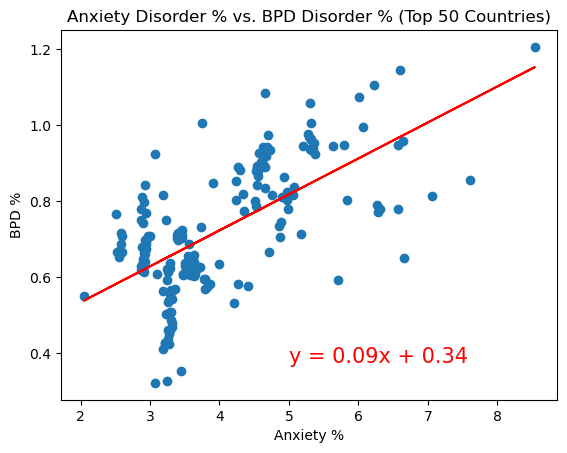

In [66]:
# Create scatter plots to visualize the correlation between anxiety and bipolar
anx_data = disorder_mean_data['Anxiety Disorders']
bpd_data = disorder_mean_data['Bipolar Disorder']
plt.scatter(anx_data, bpd_data)
plt.title('Anxiety Disorder % vs. BPD Disorder % (Top 50 Countries)')
plt.xlabel('Anxiety %')
plt.ylabel('BPD %')

# Plot the regression line
# Calculate Regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(anx_data, bpd_data)
regress_values = anx_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(anx_data,regress_values,"r-")
# Plot the regression line
plt.annotate(line_eq,(5,0.375),fontsize=15,color="red")

plt.show()

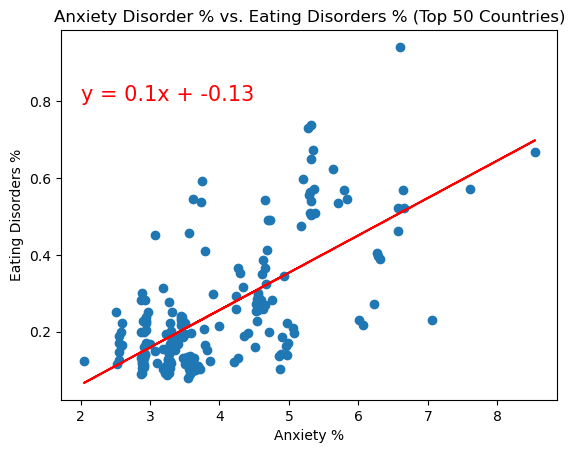

In [64]:
# Create scatter plots to visualize the correlation between anxiety and eating disorders
anx_data = disorder_mean_data['Anxiety Disorders']
eat_data = disorder_mean_data['Eating Disorders']
plt.scatter(anx_data, eat_data)
plt.title('Anxiety Disorder % vs. Eating Disorders % (Top 50 Countries)')
plt.xlabel('Anxiety %')
plt.ylabel('Eating Disorders %')

# Plot the regression line
# Calculate Regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(anx_data, eat_data)
regress_values = anx_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(anx_data,regress_values,"r-")
# Plot the regression line
plt.annotate(line_eq,(2,0.8),fontsize=15,color="red")

plt.show()

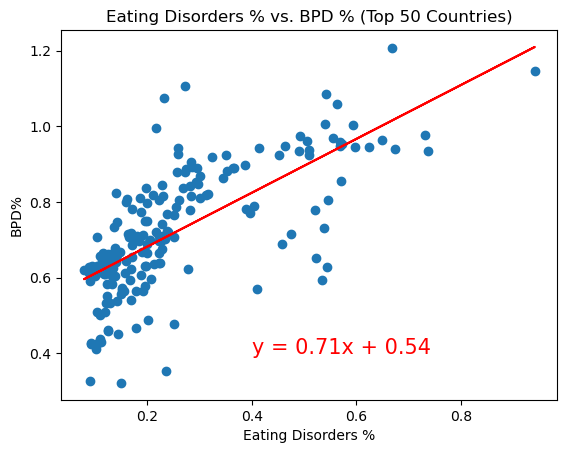

In [68]:
# Create scatter plots to visualize the correlation between eating disorders and BPD
plt.scatter(eat_data, bpd_data)
plt.title('Eating Disorders % vs. BPD % (Top 50 Countries)')
plt.xlabel('Eating Disorders %')
plt.ylabel('BPD%')

# Plot the regression line
# Calculate Regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(eat_data, bpd_data)
regress_values = eat_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(eat_data,regress_values,"r-")
# Plot the regression line
plt.annotate(line_eq,(0.4,0.4),fontsize=15,color="red")



plt.show()